BƯỚC 3: PHÂN CỤM HỌC SINH THÀNH CÁC ARCHETYPES

📂 3.1: Load user_features_standardized.csv từ Bước 2...
✅ Loaded 1110 users

Columns: ['userid', 'total_events', 'first_event', 'last_event', 'event_diversity', 'num_courses', 'active_days', 'avg_grade', 'grade_std', 'num_assessments']

📊 Clustering features: ['total_events', 'event_diversity', 'num_courses', 'active_days', 'avg_grade', 'grade_std', 'num_assessments']
   Shape: (1110, 7)

3.2: XÁC ĐỊNH OPTIMAL NUMBER OF CLUSTERS

🔍 Method 1: Elbow Method (WCSS)...
   K=2: WCSS=5500.90
   K=3: WCSS=4537.67
   K=4: WCSS=3784.57
   K=5: WCSS=3457.38
   K=6: WCSS=3141.36
   K=7: WCSS=2920.16
   K=8: WCSS=2725.16
   K=9: WCSS=2577.47
   K=10: WCSS=2450.93

🔍 Method 2: Silhouette Score (higher is better)...
   K=2: Silhouette=0.2571
   K=3: Silhouette=0.2317
   K=4: Silhouette=0.2387
   K=5: Silhouette=0.2194
   K=6: Silhouette=0.2386
   K=7: Silhouette=0.2161
   K=8: Silhouette=0.2028
   K=9: Silhouette=0.2056
   K=10: Silhouette=0.2078

🔍 Met

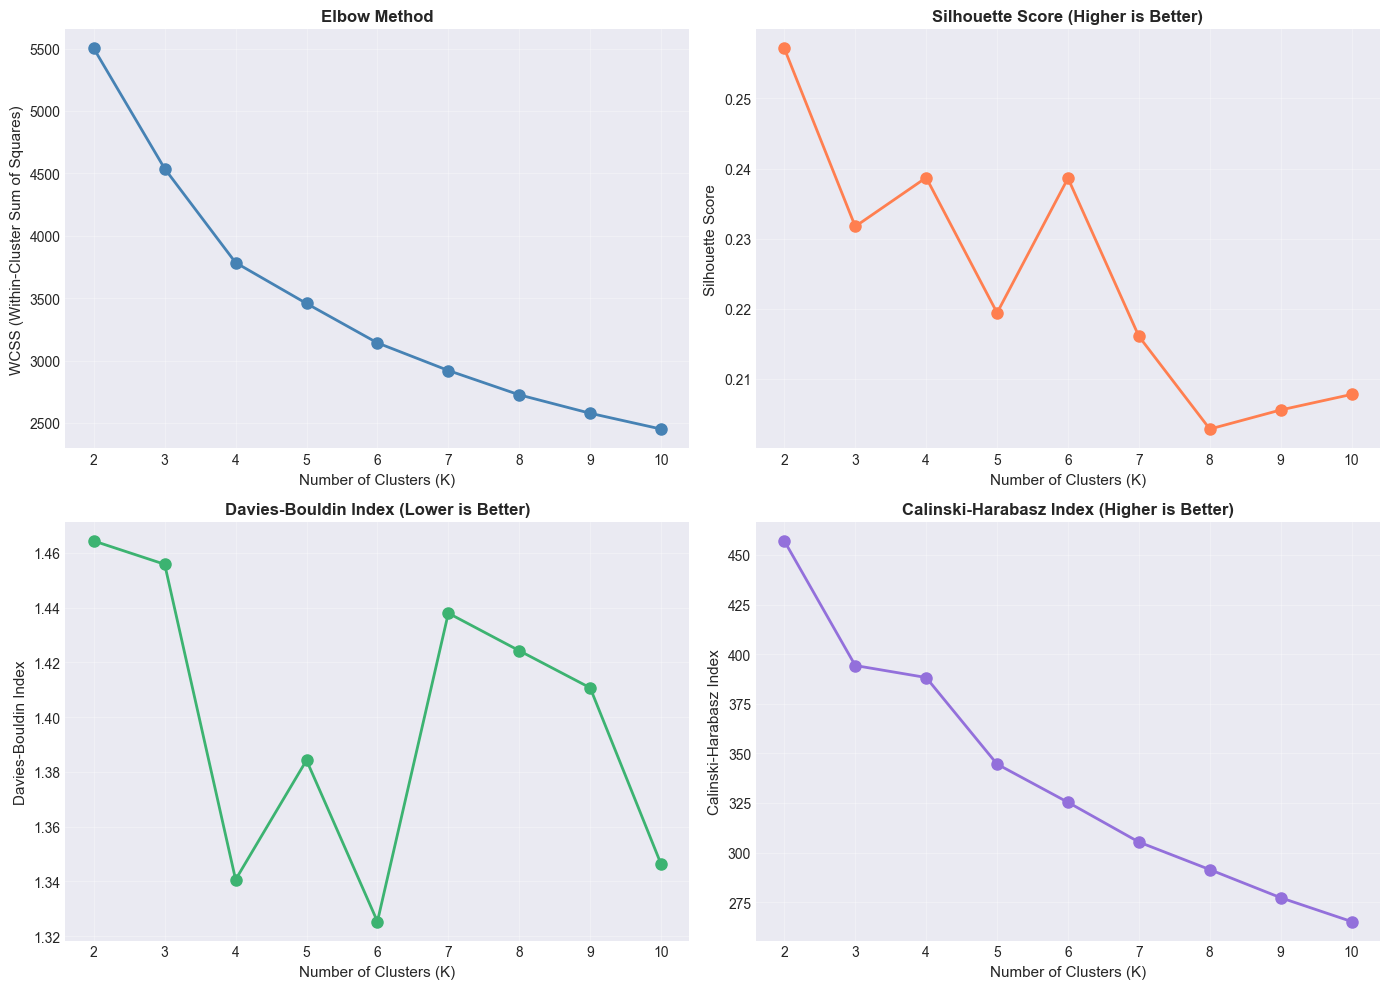

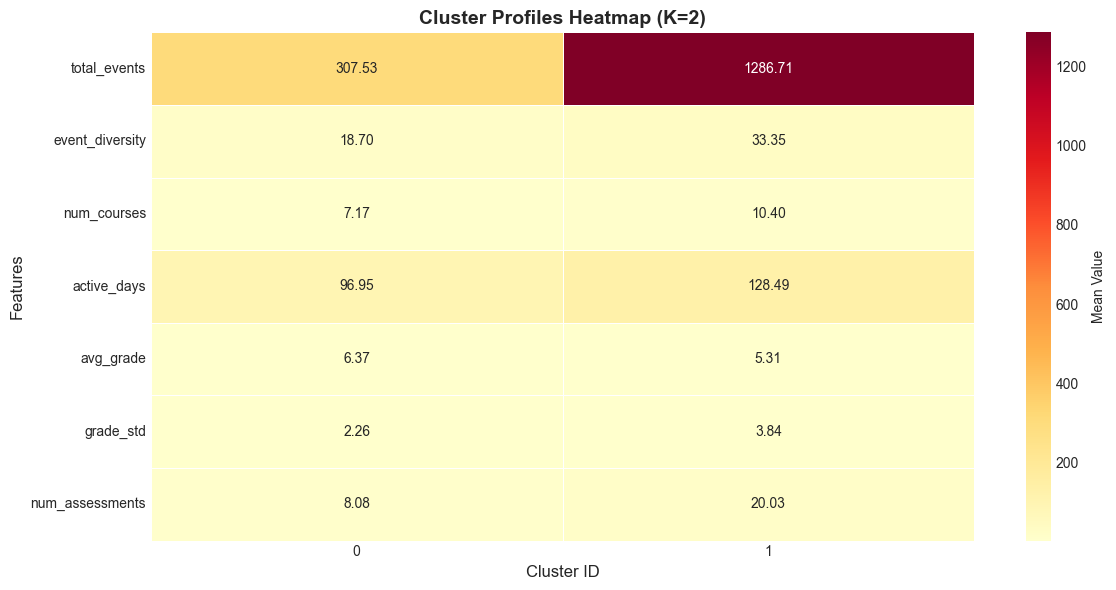

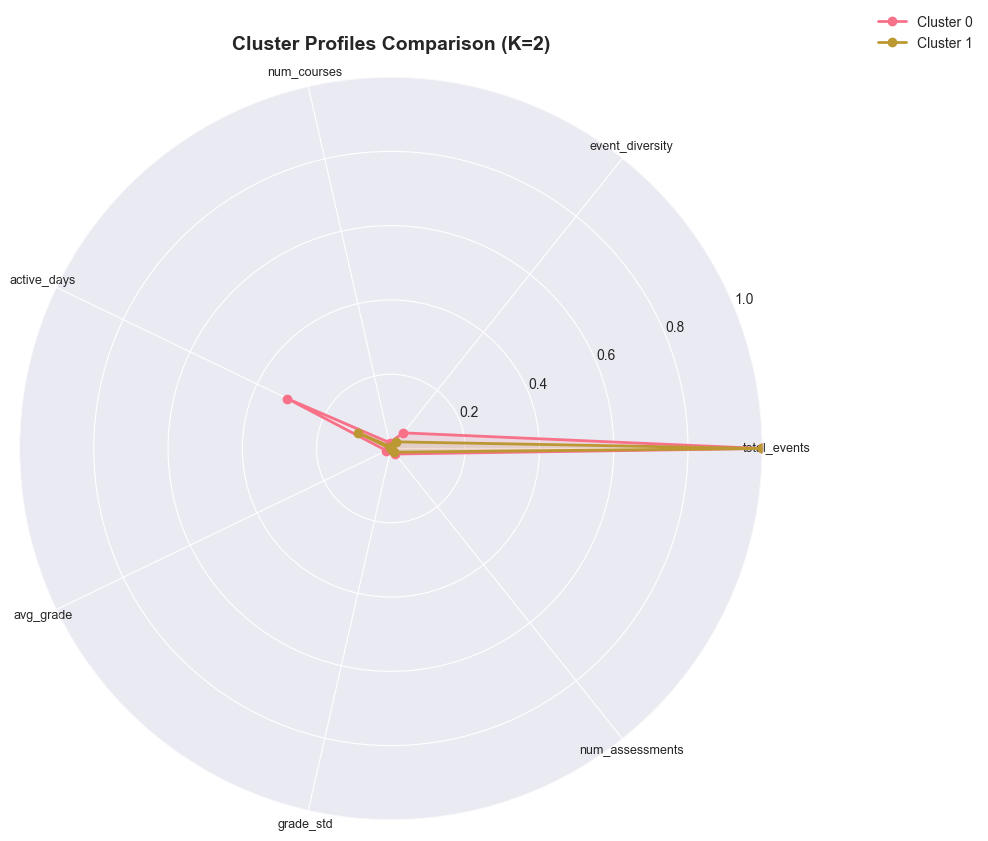

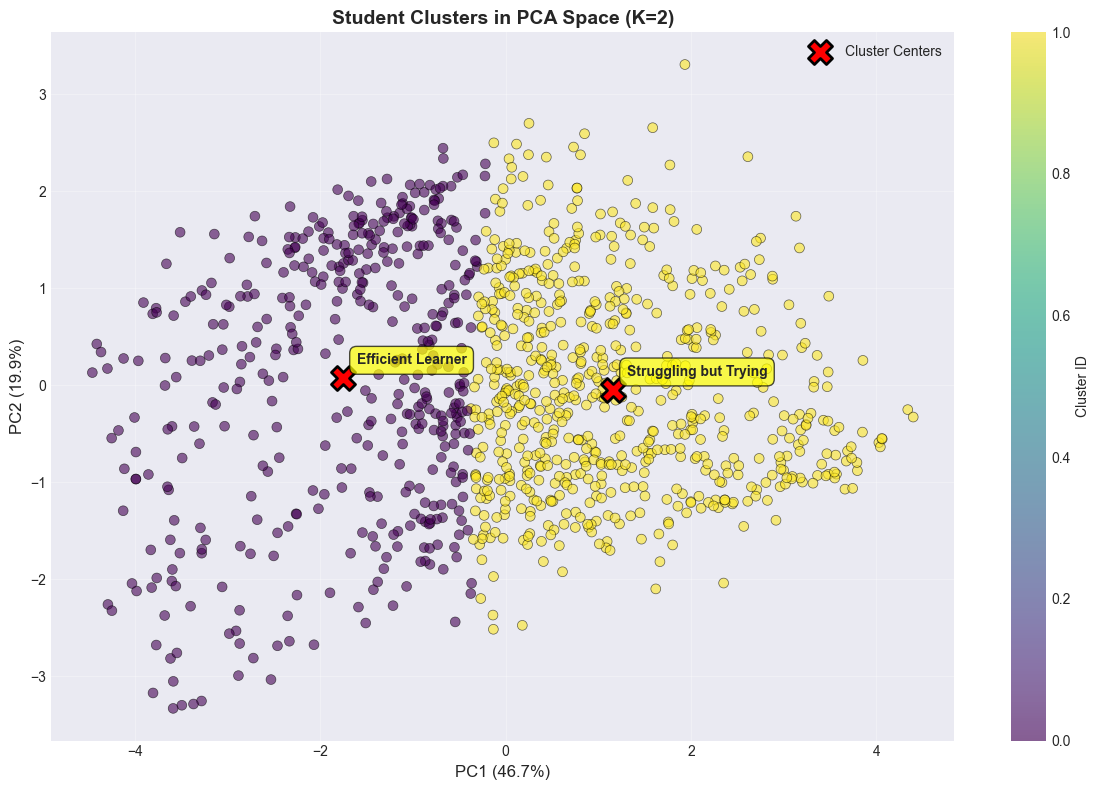

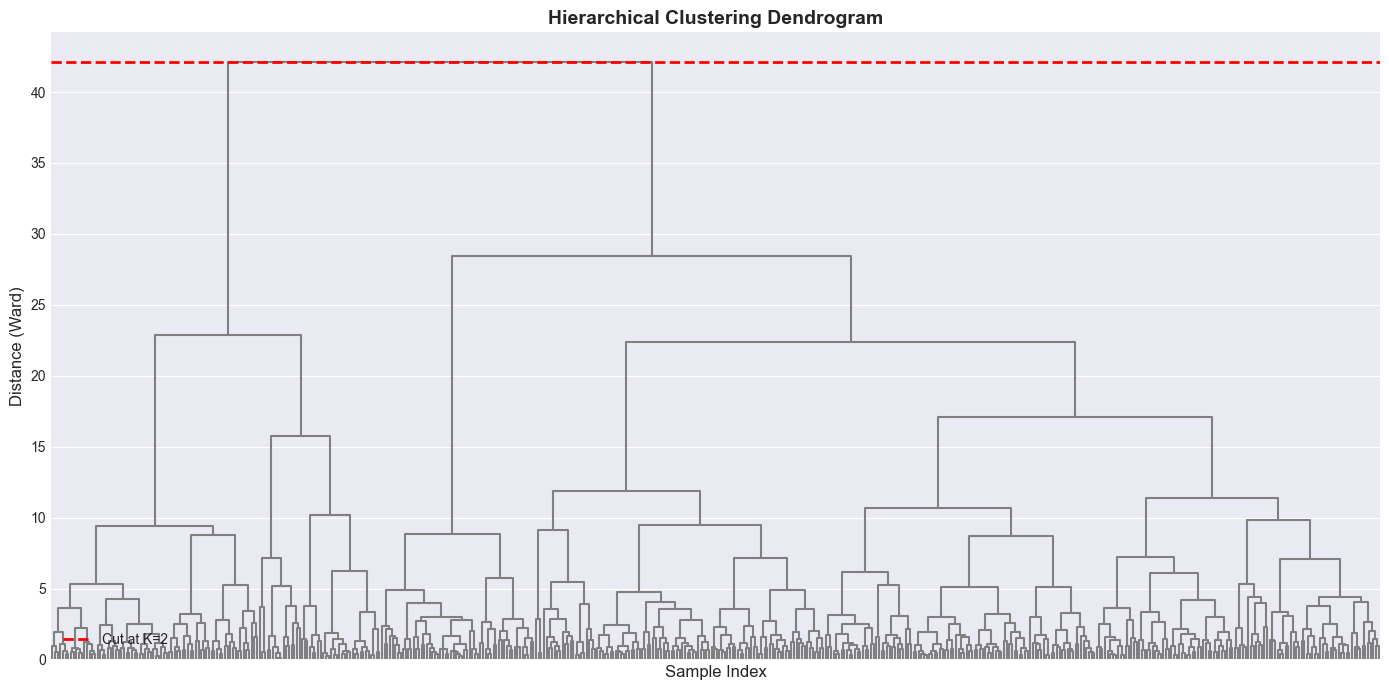

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
from sklearn.decomposition import PCA
from scipy.cluster.hierarchy import dendrogram, linkage
import json
import warnings
warnings.filterwarnings('ignore')

# ============================================================================
# BƯỚC 3: CLUSTERING STUDENTS INTO ARCHETYPES
# ============================================================================

plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

print("="*80)
print("BƯỚC 3: PHÂN CỤM HỌC SINH THÀNH CÁC ARCHETYPES")
print("="*80)

# ----------------------------------------------------------------------------
# 3.1: LOAD DỮ LIỆU TỪ BƯỚC 2
# ----------------------------------------------------------------------------
print("\n📂 3.1: Load user_features_standardized.csv từ Bước 2...")

df_standardized = pd.read_csv('../step2_feature_standardization/user_features_standardized.csv')
df_original = pd.read_csv('../step2_feature_standardization/user_features_cleaned.csv')  # For interpretation

print(f"✅ Loaded {len(df_standardized)} users")
print(f"\nColumns: {df_standardized.columns.tolist()}")

# Chọn features cho clustering (exclude userid và timestamp columns)
clustering_features = [col for col in df_standardized.columns 
                       if col not in ['userid', 'first_event', 'last_event']]

X = df_standardized[clustering_features].values
print(f"\n📊 Clustering features: {clustering_features}")
print(f"   Shape: {X.shape}")

# ----------------------------------------------------------------------------
# 3.2: DETERMINE OPTIMAL NUMBER OF CLUSTERS
# ----------------------------------------------------------------------------
print("\n" + "="*80)
print("3.2: XÁC ĐỊNH OPTIMAL NUMBER OF CLUSTERS")
print("="*80)

# Method 1: Elbow Method (Within-Cluster Sum of Squares - WCSS)
print("\n🔍 Method 1: Elbow Method (WCSS)...")
wcss = []
K_range = range(2, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
    print(f"   K={k}: WCSS={kmeans.inertia_:.2f}")

# Method 2: Silhouette Score
print("\n🔍 Method 2: Silhouette Score (higher is better)...")
silhouette_scores = []

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(X)
    score = silhouette_score(X, labels)
    silhouette_scores.append(score)
    print(f"   K={k}: Silhouette={score:.4f}")

# Method 3: Davies-Bouldin Index (lower is better)
print("\n🔍 Method 3: Davies-Bouldin Index (lower is better)...")
db_scores = []

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(X)
    score = davies_bouldin_score(X, labels)
    db_scores.append(score)
    print(f"   K={k}: Davies-Bouldin={score:.4f}")

# Method 4: Calinski-Harabasz Index (higher is better)
print("\n🔍 Method 4: Calinski-Harabasz Index (higher is better)...")
ch_scores = []

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(X)
    score = calinski_harabasz_score(X, labels)
    ch_scores.append(score)
    print(f"   K={k}: Calinski-Harabasz={score:.2f}")

# Visualization: All metrics
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Elbow plot
axes[0, 0].plot(K_range, wcss, 'o-', linewidth=2, markersize=8, color='steelblue')
axes[0, 0].set_xlabel('Number of Clusters (K)', fontsize=11)
axes[0, 0].set_ylabel('WCSS (Within-Cluster Sum of Squares)', fontsize=11)
axes[0, 0].set_title('Elbow Method', fontweight='bold', fontsize=12)
axes[0, 0].grid(True, alpha=0.3)

# Silhouette plot
axes[0, 1].plot(K_range, silhouette_scores, 'o-', linewidth=2, markersize=8, color='coral')
axes[0, 1].set_xlabel('Number of Clusters (K)', fontsize=11)
axes[0, 1].set_ylabel('Silhouette Score', fontsize=11)
axes[0, 1].set_title('Silhouette Score (Higher is Better)', fontweight='bold', fontsize=12)
axes[0, 1].grid(True, alpha=0.3)

# Davies-Bouldin plot
axes[1, 0].plot(K_range, db_scores, 'o-', linewidth=2, markersize=8, color='mediumseagreen')
axes[1, 0].set_xlabel('Number of Clusters (K)', fontsize=11)
axes[1, 0].set_ylabel('Davies-Bouldin Index', fontsize=11)
axes[1, 0].set_title('Davies-Bouldin Index (Lower is Better)', fontweight='bold', fontsize=12)
axes[1, 0].grid(True, alpha=0.3)

# Calinski-Harabasz plot
axes[1, 1].plot(K_range, ch_scores, 'o-', linewidth=2, markersize=8, color='mediumpurple')
axes[1, 1].set_xlabel('Number of Clusters (K)', fontsize=11)
axes[1, 1].set_ylabel('Calinski-Harabasz Index', fontsize=11)
axes[1, 1].set_title('Calinski-Harabasz Index (Higher is Better)', fontweight='bold', fontsize=12)
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('step3_optimal_k_analysis.png', dpi=150, bbox_inches='tight')
print("\n✅ Saved: step3_optimal_k_analysis.png")

# Recommend optimal K
optimal_k_silhouette = K_range[np.argmax(silhouette_scores)]
optimal_k_db = K_range[np.argmin(db_scores)]
optimal_k_ch = K_range[np.argmax(ch_scores)]

print(f"\n🎯 RECOMMENDED OPTIMAL K:")
print(f"   • Based on Silhouette: K={optimal_k_silhouette}")
print(f"   • Based on Davies-Bouldin: K={optimal_k_db}")
print(f"   • Based on Calinski-Harabasz: K={optimal_k_ch}")

# Chọn K final (thường chọn K có Silhouette cao nhất)
optimal_k = optimal_k_silhouette
print(f"\n✅ SELECTED K = {optimal_k} (based on Silhouette score)")

# ----------------------------------------------------------------------------
# 3.3: APPLY K-MEANS CLUSTERING WITH OPTIMAL K
# ----------------------------------------------------------------------------
print("\n" + "="*80)
print(f"3.3: ÁP DỤNG K-MEANS VỚI K={optimal_k}")
print("="*80)

kmeans_final = KMeans(n_clusters=optimal_k, random_state=42, n_init=20)
df_standardized['cluster'] = kmeans_final.fit_predict(X)
df_original['cluster'] = df_standardized['cluster']

print(f"\n✅ K-Means clustering completed")
print(f"\nCluster distribution:")
print(df_standardized['cluster'].value_counts().sort_index())

# Clustering quality metrics
final_silhouette = silhouette_score(X, df_standardized['cluster'])
final_db = davies_bouldin_score(X, df_standardized['cluster'])
final_ch = calinski_harabasz_score(X, df_standardized['cluster'])

print(f"\n📊 Final Clustering Quality:")
print(f"   • Silhouette Score: {final_silhouette:.4f}")
print(f"   • Davies-Bouldin Index: {final_db:.4f}")
print(f"   • Calinski-Harabasz Index: {final_ch:.2f}")

# ----------------------------------------------------------------------------
# 3.4: CLUSTER PROFILING & INTERPRETATION
# ----------------------------------------------------------------------------
print("\n" + "="*80)
print("3.4: PHÂN TÍCH PROFILE CỦA TỪNG CLUSTER")
print("="*80)

# Tính mean của mỗi feature cho mỗi cluster (dùng data gốc để dễ interpret)
cluster_profiles = df_original.groupby('cluster')[clustering_features].mean()

print("\n📊 Cluster Profiles (Mean values - Original scale):")
print(cluster_profiles.round(2))

# Visualization: Heatmap cluster profiles
plt.figure(figsize=(12, 6))
sns.heatmap(cluster_profiles.T, annot=True, fmt='.2f', cmap='YlOrRd', 
            cbar_kws={'label': 'Mean Value'}, linewidths=0.5)
plt.title(f'Cluster Profiles Heatmap (K={optimal_k})', fontweight='bold', fontsize=14)
plt.xlabel('Cluster ID', fontsize=12)
plt.ylabel('Features', fontsize=12)
plt.tight_layout()
plt.savefig('step3_cluster_profiles_heatmap.png', dpi=150, bbox_inches='tight')
print("✅ Saved: step3_cluster_profiles_heatmap.png")

# Radar chart cho cluster profiles
def create_radar_chart(data, categories, title):
    """Create radar chart for cluster comparison"""
    fig, ax = plt.subplots(figsize=(10, 10), subplot_kw=dict(projection='polar'))
    
    # Normalize data to 0-1 scale for better visualization
    from sklearn.preprocessing import MinMaxScaler
    scaler = MinMaxScaler()
    data_normalized = scaler.fit_transform(data.T).T
    
    angles = np.linspace(0, 2 * np.pi, len(categories), endpoint=False).tolist()
    angles += angles[:1]  # Complete the circle
    
    for idx, cluster_data in enumerate(data_normalized):
        values = cluster_data.tolist()
        values += values[:1]
        ax.plot(angles, values, 'o-', linewidth=2, label=f'Cluster {idx}', markersize=6)
        ax.fill(angles, values, alpha=0.15)
    
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(categories, size=9)
    ax.set_ylim(0, 1)
    ax.set_title(title, fontweight='bold', fontsize=14, pad=20)
    ax.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1))
    ax.grid(True)
    
    return fig

fig = create_radar_chart(cluster_profiles.values, clustering_features, 
                         f'Cluster Profiles Comparison (K={optimal_k})')
plt.tight_layout()
plt.savefig('step3_cluster_radar_chart.png', dpi=150, bbox_inches='tight')
print("✅ Saved: step3_cluster_radar_chart.png")

# ----------------------------------------------------------------------------
# 3.5: ASSIGN ARCHETYPE NAMES
# ----------------------------------------------------------------------------
print("\n" + "="*80)
print("3.5: ĐẶT TÊN STUDENT ARCHETYPES")
print("="*80)

def assign_archetype_names(cluster_profiles, features):
    """
    Tự động gán tên archetype dựa trên cluster profile
    Logic: phân tích relative ranking của các features
    """
    archetypes = {}
    
    for cluster_id in cluster_profiles.index:
        profile = cluster_profiles.loc[cluster_id]
        
        # Lấy các features chính (có thể adjust theo dataset của bạn)
        engagement = profile.get('total_events', 0)
        performance = profile.get('avg_grade', 0)
        diversity = profile.get('event_diversity', 0)
        active_days = profile.get('active_days', 0)
        
        # Determine archetype based on profile
        if performance >= cluster_profiles['avg_grade'].quantile(0.75):
            if engagement >= cluster_profiles['total_events'].quantile(0.75):
                name = "High Achiever"
                desc = "High performance + High engagement"
            else:
                name = "Efficient Learner"
                desc = "High performance + Moderate engagement"
        elif performance <= cluster_profiles['avg_grade'].quantile(0.25):
            if engagement >= cluster_profiles['total_events'].quantile(0.5):
                name = "Struggling but Trying"
                desc = "Low performance + High effort"
            else:
                name = "At-Risk Student"
                desc = "Low performance + Low engagement"
        else:
            if engagement >= cluster_profiles['total_events'].quantile(0.75):
                name = "Active Explorer"
                desc = "Moderate performance + High engagement"
            elif diversity >= cluster_profiles['event_diversity'].quantile(0.75):
                name = "Resource Seeker"
                desc = "Moderate performance + High resource diversity"
            else:
                name = "Average Learner"
                desc = "Moderate performance + Moderate engagement"
        
        archetypes[cluster_id] = {
            'name': name,
            'description': desc,
            'profile': profile.to_dict()
        }
    
    return archetypes

archetypes = assign_archetype_names(cluster_profiles, clustering_features)

print("\n🎭 STUDENT ARCHETYPES:")
for cluster_id, info in archetypes.items():
    count = len(df_original[df_original['cluster'] == cluster_id])
    percentage = count / len(df_original) * 100
    print(f"\n📌 Cluster {cluster_id}: {info['name']}")
    print(f"   • Description: {info['description']}")
    print(f"   • Size: {count} students ({percentage:.1f}%)")
    print(f"   • Profile:")
    for feature, value in info['profile'].items():
        print(f"      - {feature}: {value:.2f}")

# Map archetype names back to dataframe
archetype_mapping = {k: v['name'] for k, v in archetypes.items()}
df_original['archetype'] = df_original['cluster'].map(archetype_mapping)
df_standardized['archetype'] = df_standardized['cluster'].map(archetype_mapping)

# ----------------------------------------------------------------------------
# 3.6: PCA VISUALIZATION (2D projection)
# ----------------------------------------------------------------------------
print("\n" + "="*80)
print("3.6: VISUALIZATION VỚI PCA (2D PROJECTION)")
print("="*80)

# Apply PCA
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X)

print(f"\n📊 PCA Explained Variance:")
print(f"   • PC1: {pca.explained_variance_ratio_[0]*100:.2f}%")
print(f"   • PC2: {pca.explained_variance_ratio_[1]*100:.2f}%")
print(f"   • Total: {sum(pca.explained_variance_ratio_)*100:.2f}%")

# Plot clusters in 2D PCA space
plt.figure(figsize=(12, 8))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], 
                     c=df_standardized['cluster'], 
                     cmap='viridis', 
                     s=50, 
                     alpha=0.6,
                     edgecolors='black',
                     linewidth=0.5)

# Plot cluster centers
centers_pca = pca.transform(kmeans_final.cluster_centers_)
plt.scatter(centers_pca[:, 0], centers_pca[:, 1], 
           c='red', 
           marker='X', 
           s=300, 
           edgecolors='black',
           linewidth=2,
           label='Cluster Centers')

# Add archetype labels
for cluster_id, center in enumerate(centers_pca):
    plt.annotate(archetypes[cluster_id]['name'], 
                xy=center, 
                xytext=(10, 10),
                textcoords='offset points',
                fontsize=10,
                fontweight='bold',
                bbox=dict(boxstyle='round,pad=0.5', facecolor='yellow', alpha=0.7))

plt.xlabel(f'PC1 ({pca.explained_variance_ratio_[0]*100:.1f}%)', fontsize=12)
plt.ylabel(f'PC2 ({pca.explained_variance_ratio_[1]*100:.1f}%)', fontsize=12)
plt.title(f'Student Clusters in PCA Space (K={optimal_k})', fontweight='bold', fontsize=14)
plt.colorbar(scatter, label='Cluster ID')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('step3_pca_clusters.png', dpi=150, bbox_inches='tight')
print("✅ Saved: step3_pca_clusters.png")

# ----------------------------------------------------------------------------
# 3.7: HIERARCHICAL CLUSTERING (Alternative view)
# ----------------------------------------------------------------------------
print("\n" + "="*80)
print("3.7: HIERARCHICAL CLUSTERING DENDROGRAM")
print("="*80)

# Sample data nếu quá lớn (dendrogram với >1000 samples rất chậm)
sample_size = min(500, len(X))
indices = np.random.choice(len(X), sample_size, replace=False)
X_sample = X[indices]

# Compute linkage
linkage_matrix = linkage(X_sample, method='ward')

# Plot dendrogram
plt.figure(figsize=(14, 7))
dendrogram(linkage_matrix, 
          no_labels=True,
          color_threshold=0,
          above_threshold_color='gray')
plt.axhline(y=linkage_matrix[-optimal_k+1, 2], color='red', linestyle='--', 
           linewidth=2, label=f'Cut at K={optimal_k}')
plt.xlabel('Sample Index', fontsize=12)
plt.ylabel('Distance (Ward)', fontsize=12)
plt.title('Hierarchical Clustering Dendrogram', fontweight='bold', fontsize=14)
plt.legend()
plt.tight_layout()
plt.savefig('step3_dendrogram.png', dpi=150, bbox_inches='tight')
print("✅ Saved: step3_dendrogram.png")

# ----------------------------------------------------------------------------
# 3.8: SAVE OUTPUT CHO BƯỚC 4 VÀ 5
# ----------------------------------------------------------------------------
print("\n" + "="*80)
print("3.8: SAVE OUTPUT CHO BƯỚC 4 (MARKOV) VÀ BƯỚC 5 (SIMULATION)")
print("="*80)

# Save clustered data
df_original.to_csv('user_features_clustered.csv', index=False)
df_standardized.to_csv('user_features_clustered_standardized.csv', index=False)

# Save clustering metadata
clustering_metadata = {
    'optimal_k': int(optimal_k),
    'metrics': {
        'silhouette_score': float(final_silhouette),
        'davies_bouldin_index': float(final_db),
        'calinski_harabasz_index': float(final_ch)
    },
    'archetypes': {int(k): {
        'name': v['name'],
        'description': v['description'],
        'profile': {feat: float(val) for feat, val in v['profile'].items()},
        'count': int(len(df_original[df_original['cluster'] == k])),
        'percentage': float(len(df_original[df_original['cluster'] == k]) / len(df_original) * 100)
    } for k, v in archetypes.items()},
    'cluster_centers': kmeans_final.cluster_centers_.tolist(),
    'pca_explained_variance': pca.explained_variance_ratio_.tolist()
}

with open('clustering_metadata.json', 'w') as f:
    json.dump(clustering_metadata, f, indent=2)

print(f"✅ Saved: user_features_clustered.csv")
print(f"✅ Saved: user_features_clustered_standardized.csv")
print(f"✅ Saved: clustering_metadata.json")

# ----------------------------------------------------------------------------
# 3.9: KẾT LUẬN VÀ NEXT STEPS
# ----------------------------------------------------------------------------
print("\n" + "="*80)
print("🎯 BƯỚC 3 HOÀN THÀNH - KẾT LUẬN")
print("="*80)

print(f"""
✅ ĐÃ HOÀN THÀNH:
   1. ✓ Xác định optimal K = {optimal_k} (Elbow + Silhouette + Davies-Bouldin + Calinski-Harabasz)
   2. ✓ Áp dụng K-Means clustering
   3. ✓ Phân tích cluster profiles
   4. ✓ Gán student archetypes với tên có ý nghĩa
   5. ✓ Visualization (PCA, Radar Chart, Heatmap, Dendrogram)

📂 OUTPUT FILES:
   • user_features_clustered.csv - Data với cluster labels (DÙNG CHO BƯỚC 4)
   • clustering_metadata.json - Metadata về clustering
   • step3_optimal_k_analysis.png - Analysis các metrics
   • step3_cluster_profiles_heatmap.png - Heatmap profiles
   • step3_cluster_radar_chart.png - Radar chart comparison
   • step3_pca_clusters.png - 2D visualization
   • step3_dendrogram.png - Hierarchical clustering view

📊 CLUSTERING SUMMARY:
   • Number of clusters: {optimal_k}
   • Silhouette Score: {final_silhouette:.4f}
   • Archetypes identified: {len(archetypes)}
""")

for cluster_id, info in archetypes.items():
    count = clustering_metadata['archetypes'][cluster_id]['count']
    pct = clustering_metadata['archetypes'][cluster_id]['percentage']
    print(f"   • Cluster {cluster_id} ({info['name']}): {count} students ({pct:.1f}%)")

print(f"""
🔜 NEXT STEPS (BƯỚC 4 - BEHAVIORAL SEQUENCE ANALYSIS):
   → Dùng file: user_features_clustered.csv + raw event logs
   → Analyze behavioral sequences PER ARCHETYPE
   → Build Markov chains hoặc n-gram models
   → Tính transition probabilities giữa các event types

💡 LIÊN KẾT VỚI Q-LEARNING:
   • Archetype labels → có thể dùng như DISCRETE STATE trong Q-table
     Ví dụ: State = (archetype, knowledge_level, engagement_level)
   • Mỗi archetype có optimal learning path khác nhau
     → Q-table sẽ học personalized policy cho mỗi archetype
   • Behavioral patterns (Bước 4) → giúp thiết kế REWARD FUNCTION
     Ví dụ: "High Achiever" respond tốt với challenging content
""")

plt.show()